In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
login_times = pd.read_json('ultimate_challenge/logins.json')

In [4]:
login_times.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
login_times.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [6]:
login_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


This DataFrame consists of a single column that is of type "Datetime64". 

The first step that needs to be taken is to aggregate the login counts on 15 minute time intervals.

In [7]:
# First, we need to set index to datetimeindex to be able to resample
login_times.set_index('login_time', inplace=True)
login_times['count'] = 1

'''Another approach:
login_time_df = login_time_df.set_index('login_time')
# Check the results:
login_time_df.head(5)'''

# We will aggregate these login counts based on 15 minute time intervals
login_times.sort_index(inplace=True)
login_times_agg = login_times.resample("15min").sum()

In [8]:
login_times_agg.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [9]:
login_times_agg['count'].sum()

93142

The next step will be to visualize and describe the resulting time series of login counts in a way that best characterizes the underlying patterns of the demand of logins.

In [10]:
login_times_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


With this bit of code we can see that the DataFrame January 1, 1970 to April 13, 1970. 

Let's first look at a plot of demand for the entire period.

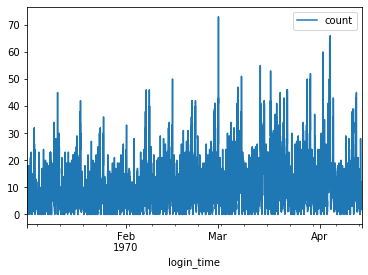

In [12]:
login_times_agg.plot()
plt.show()

This graph is too compact to be able to see much of any real data other than that demand rises with what looks like a constant period. There is probably a higher demand on the weekends. 

Let's look at a window of the 'previos day' to better see how the demand rises.

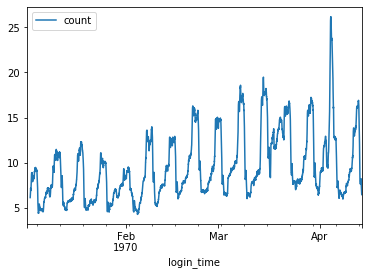

In [13]:
login_times_agg.rolling(window=96).mean().plot()
plt.show()

This shows more clearly how demand rises and falls on a weekly basis.

Let's plot demand just for just the month of February to see if we can get more granular insights:

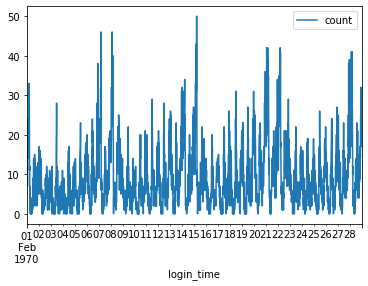

In [14]:
login_times_agg.loc['1970-02'].plot()
plt.show()

This again is not very clear and we should look at the mean development over the month:

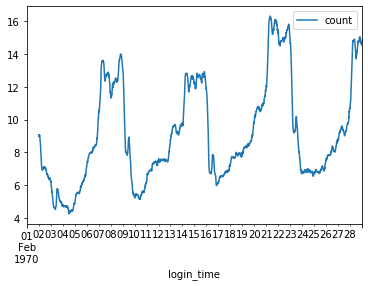

In [15]:
login_times_agg.loc['1970-02'].rolling(window=96).mean().plot()
plt.show()

It is apparent the the highest demand is on the weekends. There are some moments of decline in demand on the weekend as well. My guess would be the declines are due to nighttime. 

Let's look at a single week.

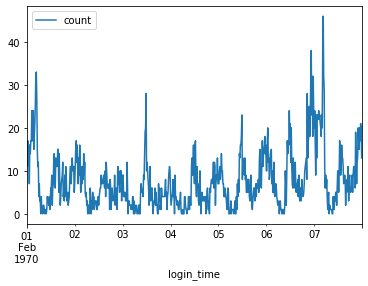

In [16]:
datetime.datetime(1970, 2, 1).weekday()

login_times_agg.loc['1970-02-01':'1970-02-07'].plot()
plt.show()

The highest peaks are at the end of week although each day has some minor demands.

We will look at the averages graphed out:

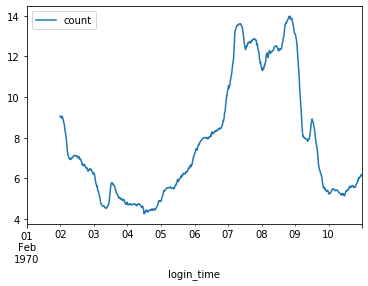

In [17]:
login_times_agg.loc['1970-02-01':'1970-02-10'].rolling(window=96).mean().plot()
plt.show()

This is where we see the demaind consentrated on the weekend.

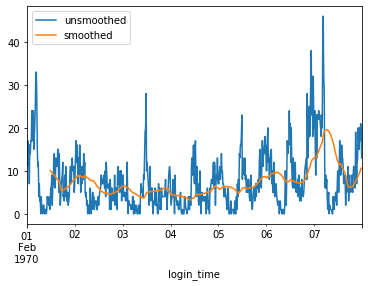

In [18]:
unsmoothed = login_times_agg['count']['1970-02-01':'1970-02-07']
smoothed = unsmoothed.rolling(window=48).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

The above graph shows the spike in demand for the weekend while smoothed out for better comprehension. 

Let's examine more closely a single weekend? How about Friday, February 13 to monday, February 16:

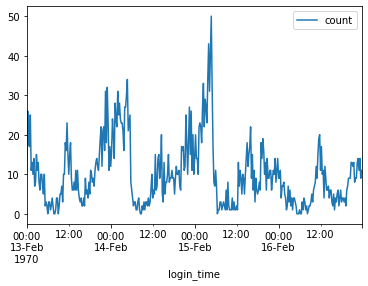

In [19]:
login_times_agg.loc['1970-02-13':'1970-02-16'].plot()
plt.show()

It appears the the pinultimate spike for demand happens around midnight with a quick dropoff.

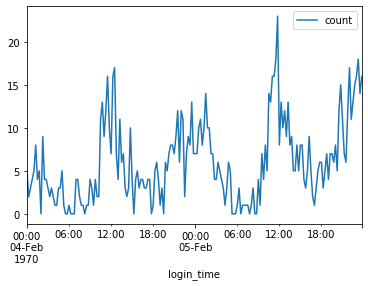

In [20]:
login_times_agg.loc['1970-02-04':'1970-02-05'].plot()
plt.show()

The first two broad conclusions from the early exploration of our data is:

Demand is greater on the weekends than weekdays.
Deman is greatest around midnight and noon for both weekdays and weekends.

In [21]:
# Managing warnings
import  warnings
warnings.simplefilter('ignore')

In [22]:
# Now we'll look at the other file for analysis 
df = pd.read_json("ultimate_challenge/ultimate_data_challenge.json")

In [23]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


The details of the columns

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [24]:
# first step is to get index of null values in dataframe
df[df['avg_rating_of_driver'].isnull()].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0


In [25]:
# let's get a quick overview of the dataframe values
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [27]:
# Let's fill in the null values wiht the means from the given values
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean()) #4.6
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].round(1)

df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean()) #4.8
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].round(1)

df['phone'] = df['phone'].fillna(df['phone'].mode().iloc[0]) #fill missing values for each column (using its own most frequent value)

# We should change the date coloums to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] =  pd.to_datetime(df['last_trip_date'])

In [29]:
# Check results.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [30]:
# We should understand how many signups have occured during the timeframe of the data set:
earliest_signup = df.signup_date.min()
latest_signup = df.signup_date.max()
signups_ct = df.signup_date.count()
last_trip = df.last_trip_date.max()

print('There were {} signups between {} and {}'.format(signups_ct, earliest_signup, latest_signup))
print('Last trip: {}'.format(last_trip))

There were 50000 signups between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
Last trip: 2014-07-01 00:00:00


In [31]:
'''This code runs through the dataframe, creating a six month frame to check if the last trip falls
within a 30 day time period. Then it ouputs a 1 or 0 depending on active user or not.'''

active_users = []
for i in range(len(df)):
    st = pd.Timestamp(df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(df['last_trip_date'][i]) <= et:
        active_users.append(1) # now that the active condition has been met, set active user to 1
    else:
        active_users.append(0)
        
df["active"]=active_users # adding the array to a new column called "rating_avg"

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  int64 

In [33]:
# drop time columns
time_cols = ['last_trip_date', 'signup_date']
df = df.drop(time_cols, axis=1)

# change "Ulimate_black_user" into an integer
bool_feature_mask = df.dtypes==np.bool
bool_cols = df.columns[bool_feature_mask].tolist()
bool_cols

def boolToint(x):
    if(x==True):
        return 1
    elif(x==False):
        return 0
    return "error"

df['ultimate_black_user'] = [1 if x == True else 0 for x in df.ultimate_black_user]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active                  50000 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 4.2+ MB


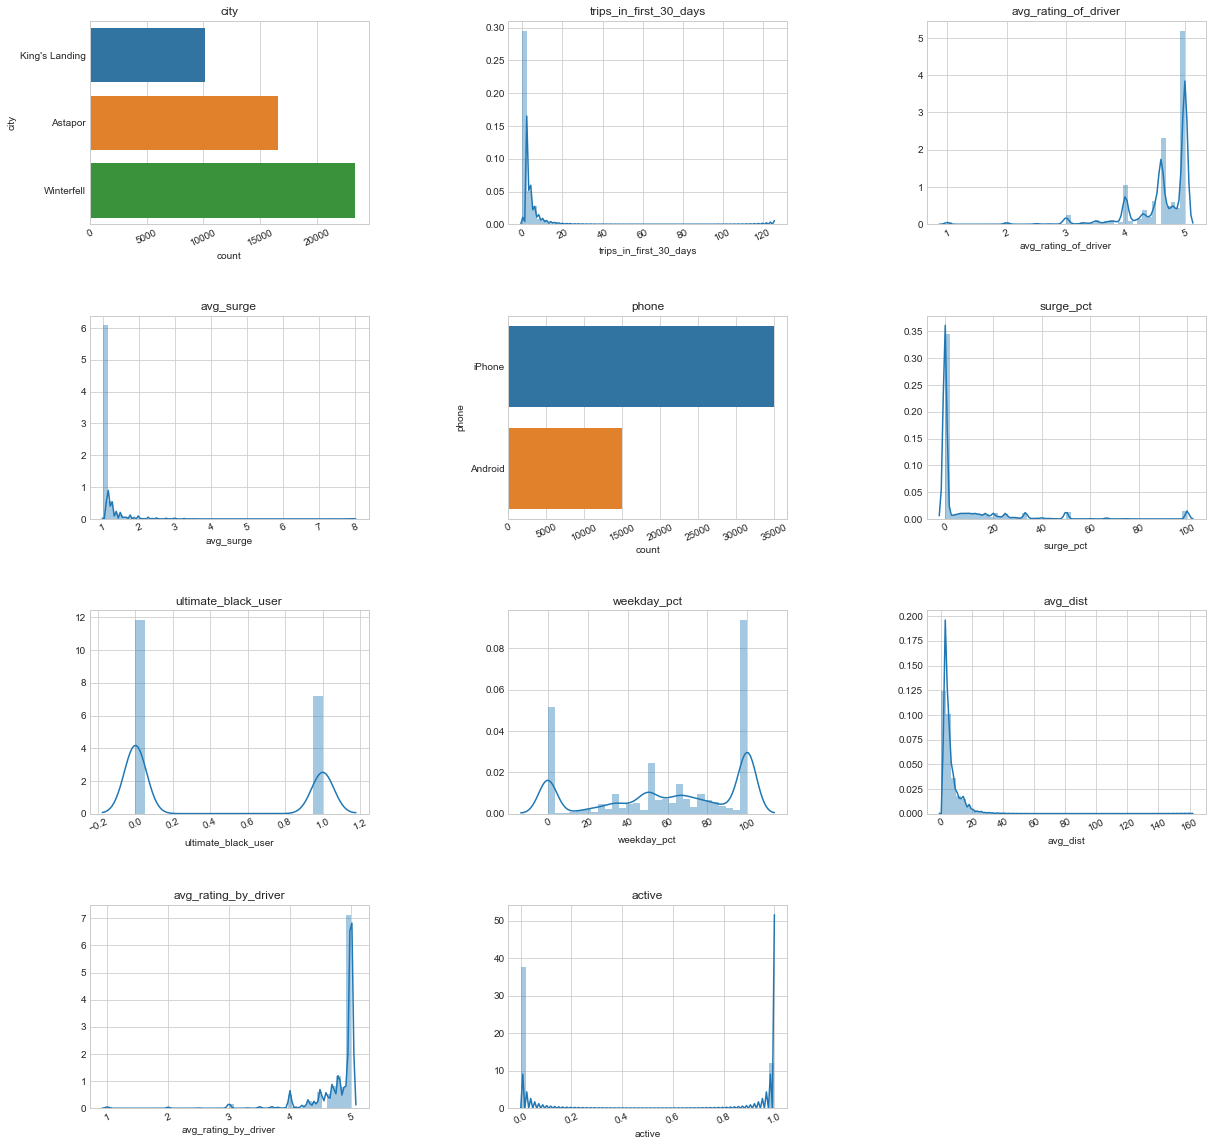

In [35]:
import math
import seaborn as sns
# Let’s plot the distribution of each feature for plot_distribution
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: #Categorical
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else: #Numerical
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

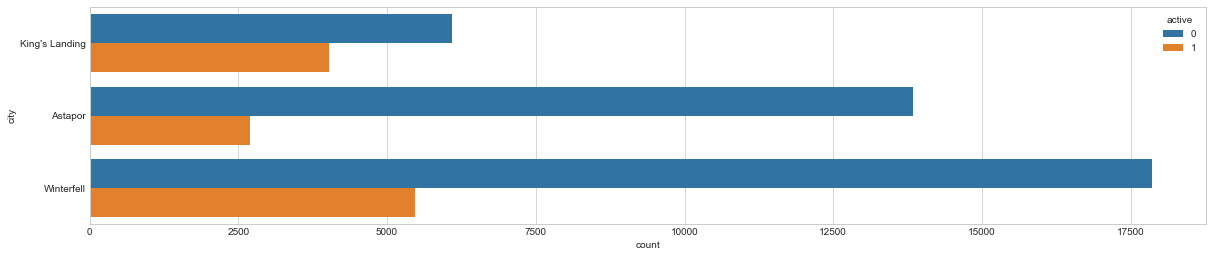

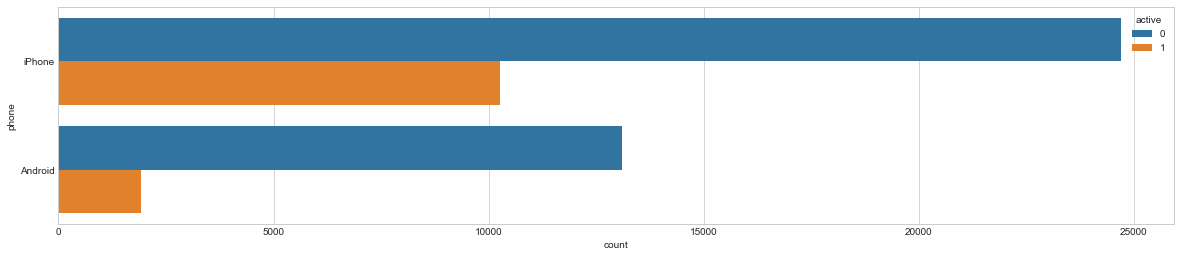

In [37]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==np.object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols

# categorical bi-variate analysis
plt.style.use('seaborn-whitegrid')

for cat in categorical_cols:
    fig = plt.figure(figsize=(20,4)) 
    sns.countplot(y=cat, hue="active", data=df)

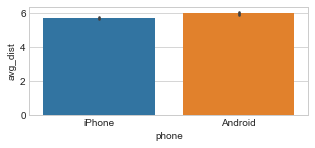

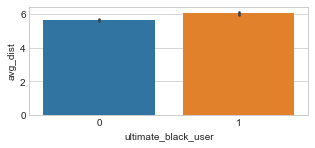

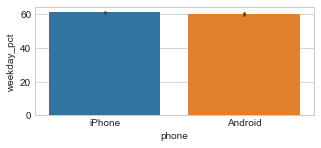

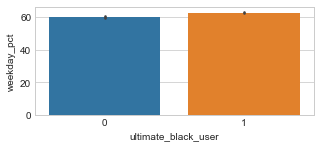

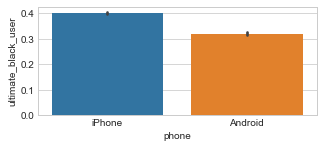

In [38]:
# two variables
fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='avg_dist', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(y='avg_dist', x='ultimate_black_user', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='weekday_pct', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(y='weekday_pct', x='ultimate_black_user', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='ultimate_black_user', data=df)

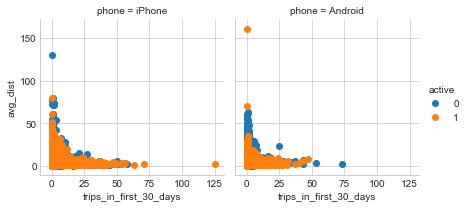

In [39]:
g = sns.FacetGrid(df, col="phone", hue="active")
g = (g.map(plt.scatter, 'trips_in_first_30_days', 'avg_dist').add_legend())

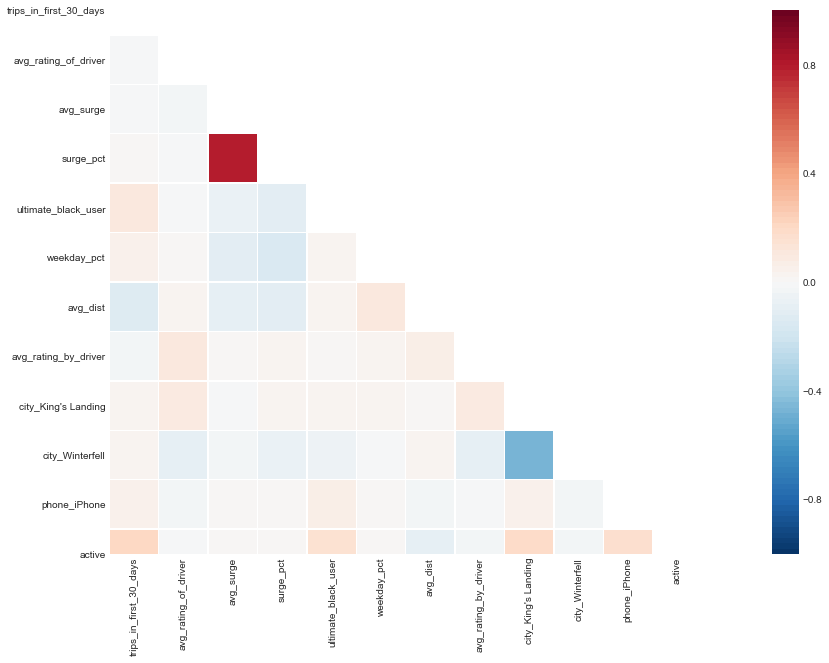

In [40]:
y = df['active']
X = df.drop('active', axis=1)

X_encoded_getdummies = pd.get_dummies(X, columns = categorical_cols, prefix_sep='_', drop_first=True)

X = X_encoded_getdummies

df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean()) #4.6
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].round(1)

df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean()) #4.8
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].round(1)

#Create a correlation plot of both datasets.

#corr_Xy = X.join(y)
corr_Xy = pd.concat([X,y], axis=1)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

#plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Xy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_Xy.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5)

Feature ranking:
1. feature 6 (0.31)
2. feature 5 (0.14)
3. feature 7 (0.10)
4. feature 2 (0.09)
5. feature 1 (0.09)
6. feature 3 (0.09)
7. feature 0 (0.08)
8. feature 8 (0.03)
9. feature 10 (0.02)
10. feature 4 (0.02)
11. feature 9 (0.01)


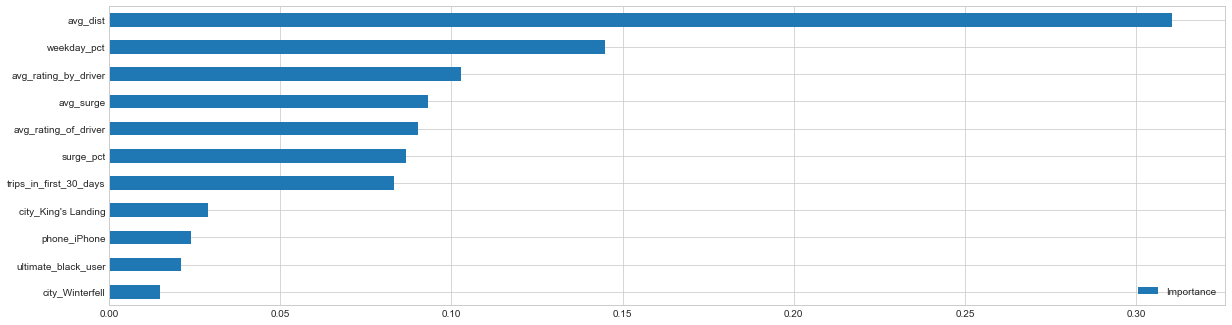

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Using Random Forest to gain an insight on Feature Importance
rfclf = RandomForestClassifier()
rfclf.fit(X, y)

plt.style.use('seaborn-whitegrid')
importances = rfclf.feature_importances_

#####
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (f + 1, indices[f], importances[indices[f]]))

#####
df_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
df_importances.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# set random_state SEED variable
SEED = 37

df_copy = df.copy()

In [48]:
# create scaler
scaler = preprocessing.StandardScaler()

int_feature_mask = df.dtypes==np.int64
int_cols = df.columns[int_feature_mask].tolist()

numeric_feature_mask = df.dtypes==np.number
numeric_cols = df.columns[numeric_feature_mask].tolist()
comb_numeric_cols = numeric_cols + int_cols

# transform numeric stats
df_copy[comb_numeric_cols] = scaler.fit_transform(df_copy[comb_numeric_cols])

# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = SEED)

# training set breakdown
#train_success = y_train.sum()
train_total = len(y_train)
#train_percent = train_success / train_total
print('Training Set Total:\t{}'.format(train_total))

# test set breakdown
#test_success = y_test.sum()
test_total = len(y_test)
#test_percent = test_success / test_total
print('Test Set Total:\t\t{}'.format(test_total))

Training Set Total:	35000
Test Set Total:		15000


In [49]:
"""All of the extra libraries and modules to run the predictions and analysis!"""
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
#tree
#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

import time
import datetime

In [50]:
# This is a function to calculate the fpr and tpr for thresholds of classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [51]:
# This function will run requested algorithms and return an accuracy metrics for consideration 
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [52]:
# Function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## Logistic Regression 

Random Search for Hyperparameters

In [53]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 87.93 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.770 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 916.8456517273577, 'class_weight': None, 'C': 0.0916001510062379}

Model with rank: 2
Mean validation score: 0.757 (std: 0.000)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2.4913781081505024e-16, 'class_weight': None, 'C': 4.53592292717419e-14}

Model with rank: 2
Mean validation score: 0.757 (std: 0.000)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2627495338417096.0, 'class_weight': None, 'C': 9.66270030570103e-10}

Model with rank: 2
Mean validation score: 0.757 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.0037132738203638238, 'class_weight': None, 'C': 1.4461589230674417e-18}

Model with rank: 2
Mean validation score: 0.757 (std: 0.000)
Parameters: {'penalty': 'l1', 'intercept_scaling': 31510.1046099505, 'class_weight': 'balanced', 'C': 2.7079663559419844e-14}



In [54]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 76.63
Accuracy CV 10-Fold: 76.99
Running Time: 0:00:01.342316


In [55]:
print(metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     26503
           1       0.58      0.19      0.28      8497

    accuracy                           0.77     35000
   macro avg       0.68      0.57      0.57     35000
weighted avg       0.74      0.77      0.72     35000



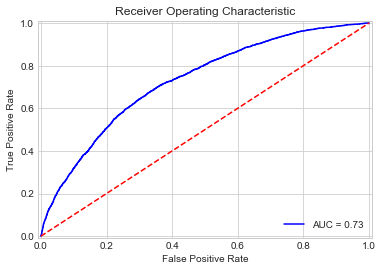

In [56]:
plot_roc_curve(y_test, probs_log)

## K-Nearest Neighbors

In [57]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, y_test,
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 75.56
Accuracy CV 10-Fold: 75.29
Running Time: 0:00:02.958491


In [58]:
print(metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     26503
           1       0.49      0.40      0.44      8497

    accuracy                           0.75     35000
   macro avg       0.65      0.63      0.64     35000
weighted avg       0.74      0.75      0.74     35000



In [59]:
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     11299
           1       0.51      0.41      0.45      3701

    accuracy                           0.76     15000
   macro avg       0.66      0.64      0.65     15000
weighted avg       0.74      0.76      0.75     15000



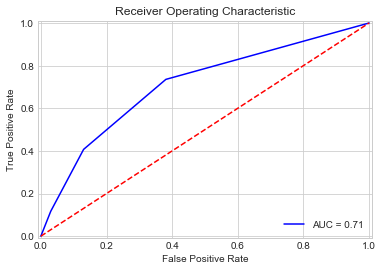

In [60]:
plot_roc_curve(y_test, probs_knn)

## Decision Tree Classifier

In [61]:
# Decision Tree Classifier
start_time = time.time()

def fit_ml_algo_clf(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs, model

train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt, clf_obj = fit_ml_algo_clf(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, y_test,
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 71.99
Accuracy CV 10-Fold: 72.58
Running Time: 0:00:00.734704


In [62]:
print(metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     26503
           1       0.44      0.44      0.44      8497

    accuracy                           0.73     35000
   macro avg       0.63      0.63      0.63     35000
weighted avg       0.73      0.73      0.73     35000



In [63]:
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     11299
           1       0.43      0.43      0.43      3701

    accuracy                           0.72     15000
   macro avg       0.62      0.62      0.62     15000
weighted avg       0.72      0.72      0.72     15000



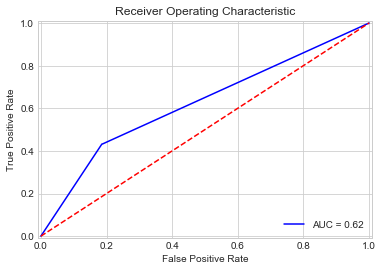

In [64]:
plot_roc_curve(y_test, probs_dt)

## Random Forest Classifier

In [65]:
# Random Forest Classifier

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 3.07 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.793 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.793 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 9}

Model with rank: 4
Mean validation score: 0.792 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 9, 'min_samples_split': 14}

Model with rank: 5
Mean validation score: 0.790 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth

In [66]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, y_test,
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 78.05
Accuracy CV 10-Fold: 78.6
Running Time: 0:00:02.445487


In [67]:
print(metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     26503
           1       0.58      0.42      0.49      8497

    accuracy                           0.79     35000
   macro avg       0.71      0.66      0.68     35000
weighted avg       0.77      0.79      0.77     35000



In [68]:
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     11299
           1       0.58      0.41      0.48      3701

    accuracy                           0.78     15000
   macro avg       0.70      0.66      0.67     15000
weighted avg       0.76      0.78      0.77     15000



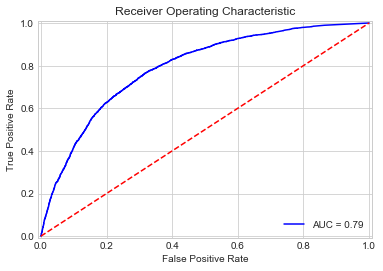

In [69]:
plot_roc_curve(y_test, probs_rf)

# Rating the models

In [70]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Accuracy': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_dt,
           ]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,78.05
1,Logistic Regression,76.63
0,KNN,75.56
3,Decision Tree,71.99
